In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Tokenization

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [2]:
input_str = "Today's weather is good, very windy and sunny, we have no classes in the afternoon. We shall play basketball."

In [6]:
tokens = word_tokenize(input_str)


In [7]:
tokens = [word.lower() for word in tokens]
tokens[:5]

['today', "'s", 'weather', 'is', 'good']

### Text object

In [9]:
t = Text(tokens)

In [10]:
t.count('good')

1

In [11]:
t.index('good')

4

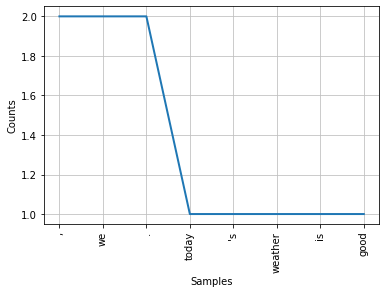

In [13]:
t.plot(8)


### Stop Words

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stopwords.readme().replace('\n', ' ')

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [17]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [18]:
stopwords.raw('english').replace('\n', ' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [20]:
test_words = [word.lower() for word in tokens]
test_words_set = set(test_words)

In [21]:
test_words_set.intersection(set(stopwords.words('english')))

{'and', 'have', 'in', 'is', 'no', 'the', 'very', 'we'}

### filter stopwords

In [22]:
filtered  = [w for w in test_words_set if (w not in stopwords.raw('english'))]
filtered

['classes',
 'today',
 'shall',
 '.',
 'good',
 'sunny',
 'weather',
 'windy',
 'basketball',
 ',',
 'afternoon',
 'play']

### Part-of-Speech (PoS) tagging

In [23]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('very', 'RB'),
 ('windy', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('classes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 ('.', '.'),
 ('we', 'PRP'),
 ('shall', 'MD'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('.', '.')]

| POS Tag |指代 |
| --- | --- |
| CC | 并列连词 |
| CD | 基数词 |
| DT | 限定符|
| EX | 存在词|
| FW |外来词 |
| IN | 介词或从属连词|
| JJ | 形容词 |
| JJR | 比较级的形容词  |
| JJS | 最高级的形容词 |
| LS | 列表项标记 |
| MD | 情态动词 |
| NN |名词单数|
| NNS | 名词复数  |
| NNP |专有名词|
| PDT | 前置限定词 |
| POS | 所有格结尾|
| PRP | 人称代词  |
| PRP$ | 所有格代词 |
| RB |副词 |
| RBR | 副词比较级 |
| RBS | 副词最高级 |
| RP | 小品词 |
| UH | 感叹词 |
| VB |动词原型 |
| VBD | 动词过去式 |
| VBG |动名词或现在分词 |
| VBN |动词过去分词|
| VBP |非第三人称单数的现在时|
| VBZ | 第三人称单数的现在时 |
| WDT |以wh开头的限定词 |

### chunking

In [26]:
from nltk.chunk import RegexpParser

In [27]:
sentence = [('the','DT'),('little','JJ'),('yellow','JJ'),('dog','NN'),('died','VBD')]
grammer = "MY_NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammer) #form pattern
result = cp.parse(sentence) #chunking
print(result)

result.draw() #use matplotlib to draw

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


### Named Entity Recognition

In [28]:
nltk.download()
# maxent_ne_chunke
#words

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [29]:
from nltk import ne_chunk
sentence = 'Edison went to Tsinghua University today.'
print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  (PERSON Edison/NNP)
  went/VBD
  to/TO
  (ORGANIZATION Tsinghua/NNP University/NNP)
  today/NN
  ./.)


### Data cleaning example

In [31]:
import re
from nltk.corpus import stopwords
# imput data
s = '    RT @Amila #Test\nTom\'s newly listed Co  &amp; Mary\'s unlisted     Group to supply tech for nlTK.\nh $TSLA $AAPL https:// t.co/x34afsfQsh'

#stopwords = english
cache_english_stopwords = stopwords.words('english')

def text_clean(text):
    print('raw text data:', text, '\n')
    
    #get rid of HTML tags (e.g. &amp)
    text_no_special_entities = re.sub(r'\&\w*;|#\w*|@\w*', '', text)
    print('after cleaned special tags: ', text_no_special_entities, '\n')
    
    # get rid of tickers
    text_no_tickers = re.sub(r'\$\w*', '', text_no_special_entities) 
    print('after cleaned tickers:', text_no_tickers, '\n')
    
    #get rid of hyperlinks
    text_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', text_no_tickers) 
    print('after cleaned hyperlinks:', text_no_hyperlinks, '\n')
    
    # get rid of the abbreviation, in other words, words with fewer letter
    text_no_small_words = re.sub(r'\b\w{1,2}\b', '', text_no_hyperlinks) 
    print('after cleaned small words:', text_no_small_words, '\n')
    
    # Remove extra spaces
    text_no_whitespace = re.sub(r'\s\s+', ' ', text_no_small_words)
    text_no_whitespace = text_no_whitespace.lstrip(' ') 
    print('after removing spaces:', text_no_whitespace, '\n')
    
    #tokenization
    tokens = word_tokenize(text_no_whitespace)
    print('tokenized: ', tokens, '\n')
    
    # remove stopwords
    list_no_stopwords = [i for i in tokens if i not in cache_english_stopwords]
    print('removed stopwords:', list_no_stopwords, '\n')
    
    #join the list of words
    text_filtered = ' '.join(list_no_stopwords) # ''.join() would join without spaces between words.
    print('after filtered:', text_filtered)
   
text_clean(s)

raw text data:     RT @Amila #Test
Tom's newly listed Co  &amp; Mary's unlisted     Group to supply tech for nlTK.
h $TSLA $AAPL https:// t.co/x34afsfQsh 

after cleaned special tags:      RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h $TSLA $AAPL https:// t.co/x34afsfQsh 

after cleaned tickers:     RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h   https:// t.co/x34afsfQsh 

after cleaned hyperlinks:     RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h    

after cleaned small words:       
Tom' newly listed    Mary' unlisted     Group  supply tech for nlTK.
    

after removing spaces: Tom' newly listed Mary' unlisted Group supply tech for nlTK.  

tokenized:  ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'for', 'nlTK', '.'] 

removed stopwords: ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'nlTK', '.'] 

aft